##Aprendizaje por Refuerzo

Esta técnica es diferente a muchas de las otras técnicas de aprendizaje automático que hemos visto anteriormente y tiene numerosas aplicaciones en el entrenamiento de agentes (IA) para interactuar con entornos como los juegos. En lugar de alimentar nuestro modelo de aprendizaje automático con millones de ejemplos, permitimos que nuestro modelo genere sus propios ejemplos explorando un entorno. El concepto es simple. Los humanos aprendemos explorando y aprendiendo de nuestros errores y experiencias pasadas, así que hagamos que nuestra computadora haga lo mismo.

###Terminología
Antes de profundizar en la explicación del aprendizaje por refuerzo, necesitamos definir algunos términos clave.

**Entorno** En las tareas de aprendizaje por refuerzo, tenemos la noción de entorno. Este es lo que nuestro *agente* explorará. Un ejemplo de entorno, al entrenar una IA para jugar, por ejemplo, a Mario, sería el nivel en el que estamos entrenando al agente.

**Agente**: un agente es una entidad que explora el entorno. Nuestro agente interactuará y realizará diferentes acciones dentro del entorno. En nuestro ejemplo de Mario, el personaje de Mario dentro del juego sería nuestro agente.

**Estado**: nuestro agente siempre estará en lo que llamamos un *estado*. El estado simplemente nos indica su estado. El ejemplo más común de estado es la ubicación del agente dentro del entorno. Mover la ubicación cambiaría el estado del agente.

**Acción**: cualquier interacción entre el agente y el entorno se considera una acción. Por ejemplo, moverse a la izquierda o saltar es una acción. Una acción puede o no cambiar el *estado* actual del agente. De hecho, ¡no hacer nada también es una acción! Por ejemplo, no pulsar una tecla, si usamos el ejemplo de Mario.

**Recompensa**: cada acción que realiza nuestro agente genera una recompensa de cierta magnitud (positiva o negativa). El objetivo del agente es maximizar su recompensa en un entorno. A veces, la recompensa es clara; por ejemplo, si un agente realiza una acción que aumenta su puntuación en el entorno, podríamos decir que ha recibido una recompensa positiva. Si el agente realiza una acción que le hace perder puntuación o incluso morir en el entorno, recibirá una recompensa negativa.

La parte más importante del aprendizaje por refuerzo es determinar cómo recompensar al agente. Después de todo, el objetivo del agente es maximizar sus recompensas. Esto significa que debemos recompensar al agente adecuadamente para que alcance el objetivo deseado.

###Q-Learning
Ahora que tenemos una idea general de cómo funciona el aprendizaje por refuerzo, es hora de hablar de una técnica específica llamada *Q-Learning*.

Q-Learning es una técnica simple pero muy potente en el aprendizaje automático que implica el aprendizaje de una matriz de valores de acción-recompensa. Esta matriz se conoce a menudo como Tabla Q o Matriz Q. La matriz tiene la forma (número de estados posibles, número de acciones posibles), donde cada valor en la matriz [n, m] representa la recompensa esperada del agente dado que se encuentra en el estado n y realiza la acción m. El algoritmo de Q-Learning define cómo actualizamos los valores de la matriz y decidimos qué acción tomar en cada estado. La idea es que, tras un entrenamiento/aprendizaje exitoso de esta Tabla Q/matriz, podamos determinar la acción que un agente debe realizar en cualquier estado observando la fila de ese estado en la matriz y tomando la columna de valor máximo como la acción.

**Considere este ejemplo.**

Supongamos que A1-A4 son las posibles acciones y que cada fila representa 3 estados (estado 1 - estado 3).

| A1 | A2 | A3 | A4 |
|:--: |:--: |:--: |:--: |
| 0 | 0 | 10 | 5 |
| 5 | 10 | 0 | 0 |
| 10 | 5 | 0 | 0 |

Si esa fuera nuestra tabla/matriz Q, las siguientes serían las acciones preferidas en cada estado:

> Estado 1: A3

> Estado 2: A2

> Estado 3: A1

Podemos ver que esto se debe a que los valores en cada una de esas columnas son los más altos para esos estados.

###Aprendiendo la Tabla Q
Es sencillo, ¿verdad? Ahora, ¿cómo creamos esta tabla y encontramos esos valores? Aquí es donde analizaremos cómo el algoritmo de aprendizaje Q actualiza los valores en nuestra Tabla Q.

Comenzaré señalando que nuestra Tabla Q comienza con todos los valores 0. Esto se debe a que el agente aún no ha aprendido nada sobre el entorno.

Nuestro agente aprende explorando el entorno y observando el resultado/recompensa de cada acción que realiza en cada estado. Pero ¿cómo sabe qué acción realizar en cada estado? Hay dos maneras en que nuestro agente puede decidir qué acción realizar.
1. Seleccionar aleatoriamente una acción válida.
2. Usar la Tabla Q actual para encontrar la mejor acción.

Al comienzo del aprendizaje, nuestro agente realizará principalmente acciones aleatorias para explorar el entorno y entrar en diferentes estados. A medida que explora más el entorno, comenzará a depender gradualmente de sus valores aprendidos (Tabla Q) para tomar acciones. Esto significa que, a medida que nuestro agente explora más el entorno, desarrollará una mejor comprensión y comenzará a tomar acciones "correctas" o mejores con mayor frecuencia. Es importante que el agente mantenga un buen equilibrio entre la realización de acciones aleatorias y el uso de valores aprendidos para evitar quedar atrapado en un máximo local.

Después de cada nueva acción, nuestro agente registrará el nuevo estado (si lo hay) al que ha entrado y la recompensa que recibió por realizarla. Estos valores se utilizarán para actualizar la Tabla Q. El agente dejará de tomar nuevas acciones solo cuando se alcance un límite de tiempo determinado, se haya alcanzado el objetivo o se haya llegado al final del entorno.

####Actualización de valores Q
La fórmula para actualizar la tabla Q después de cada acción es la siguiente:

$$ Q[estado, a] = Q[estado, a] + \alpha * (R + \gamma * máx. (Q[nuevoEstado, :]) - Q[estado, a]) $$

- $\alpha$ representa la **Tasa de Aprendizaje**

- $\gamma$ representa el **Factor de Descuento**

####Tasa de Aprendizaje $\alpha$
La tasa de aprendizaje $\alpha$ es una constante numérica que define el grado de cambio permitido en cada actualización de la tabla Q. Una tasa de aprendizaje alta significa que cada actualización introducirá un cambio significativo en el valor actual de estado-acción. Una tasa de aprendizaje baja significa que cada actualización tendrá un cambio más sutil. Modificar la tasa de aprendizaje cambiará la forma en que el agente explora el entorno y la rapidez con la que determina los valores finales en la tabla Q.

####Factor de descuento $\gamma$
El factor de descuento, también conocido como gamma ($\gamma$), se utiliza para equilibrar la importancia de la recompensa actual y futura. Un factor de descuento alto significa que las recompensas futuras se considerarán con mayor intensidad.

<br/>
<p>Para realizar actualizaciones en esta tabla, dejaremos que el agente explore el entorno durante un período determinado y usaremos cada una de sus acciones para realizar una actualización. Poco a poco, comenzaremos a notar que el agente aprende y elige mejores acciones. </p>

## Q-Learning: resolvemos un ejemplo

En este ejemplo, usaremos el algoritmo Q-Learning para entrenar a un agente a navegar por un entorno popular de [Open AI Gym](https://gym.openai.com/). Open AI Gym se desarrolló para que los programadores pudieran practicar el aprendizaje automático en entornos únicos. Un dato interesante: ¡Elon Musk es uno de los fundadores de OpenAI!

Comencemos por ver qué es Open AI Gym.

In [ ]:
import gymnasium as gym   # all you have to do to import and use open ai gym!

Una vez que importes el gimnasio, puedes cargar un entorno usando la línea ```gym.make("environment")```.

In [ ]:
env = gym.make('FrozenLake-v1',render_mode="rgb_array")  # we are going to use the FrozenLake enviornment

Hay algunos otros comandos que se pueden utilizar para interactuar y obtener información sobre el entorno.

In [ ]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [ ]:
env.reset()  # reset enviornment to default state

(0, {'prob': 1})

In [ ]:
action = env.action_space.sample()  # get a random action

In [ ]:
new_state, reward, terminated, truncated, info = env.step(action)  # take action, notice it returns information about the action

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
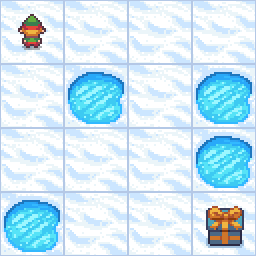

In [ ]:
env.render()   # render the GUI for the enviornment

###Entorno de Lago Congelado
Ahora que comprendemos el funcionamiento básico del entorno del gimnasio, es hora de analizar el problema específico que resolveremos.

El entorno que cargamos anteriormente, ```FrozenLake-v1``, es uno de los más sencillos de Open AI Gym. El objetivo del agente es navegar por un lago congelado y encontrar la meta sin caerse a través del hielo (representa el entorno anterior para ver un ejemplo).

Hay:
- 16 estados (uno por cada casilla)
- 4 acciones posibles (IZQUIERDA, DERECHA, ABAJO, ARRIBA)
- 4 tipos de bloques diferentes (F: congelado, H: agujero, S: inicio, G: meta)

###Creación de la tabla Q

Lo primero que debemos hacer es crear una tabla Q vacía que podamos usar para almacenar y actualizar nuestros valores.

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1',render_mode="rgb_array")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

###Constants
As we discussed we need to define some constants that will be used to update our Q-Table and tell our agent when to stop training.

In [ ]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

###Picking an Action
Remember that we can pick an action using one of two methods:
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

Here we will define a new value $\epsilon$ that will tell us the probabillity of selecting a random action. This value will start off very high and slowly decrease as the agent learns more about the enviornment.

In [ ]:
epsilon = 0.9  # start with a 90% chance of picking a random action
state = 9

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

###Updating Q Values
The code below implements the formula discussed above.



```
#Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])
```



In [ ]:
#Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

###Putting it Together
Now that we know how to do some basic things we can combine these together to create our Q-Learning algorithm,

In [ ]:
import gymnasium as gym
import numpy as np
import time

env = gym.make('FrozenLake-v1',render_mode="rgb_array")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [ ]:
rewards = []
for episode in range(EPISODES):

  state, _ = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()
    # epsilon, coeficiente entre 0 y 1 para determinar la aleatoriedad de la eleccion de una accion
    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, terminated, truncated, info  = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    done = terminated or truncated

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.58201248e-01 1.48806511e-02 1.20826540e-02 9.33849860e-03]
 [1.50290133e-03 1.69093006e-03 5.69090901e-03 2.70096533e-01]
 [3.95018618e-03 4.87242713e-03 3.45811893e-03 1.50266711e-01]
 [3.46944637e-03 3.04665816e-03 2.63741004e-03 9.08262076e-02]
 [5.89300081e-01 1.12301609e-02 1.37053541e-02 1.01444975e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.47182146e-05 1.29321793e-04 3.45198809e-02 8.61807750e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.45489276e-02 3.41922953e-03 7.94495997e-03 6.10117228e-01]
 [2.74078207e-03 3.48448643e-01 9.37044518e-03 5.26890916e-03]
 [1.96612542e-01 8.66481559e-04 4.86101108e-04 6.71831294e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.92450982e-02 2.26283383e-02 6.18423750e-01 1.27926322e-02]
 [7.34226056e-02 6.78565800e-01 6.52536295e-02 7.03109826e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

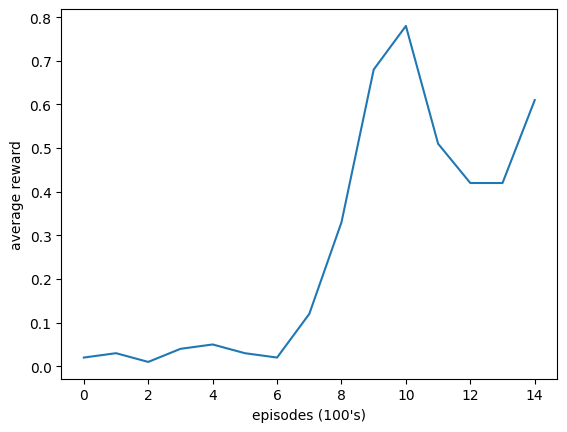

In [ ]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

## Referencias
1. Violante, Andre. “Simple Reinforcement Learning: Q-Learning.” Medium, Towards Data Science, 1 July 2019, https://towardsdatascience.com/simple-reinforcement-learning-q-learning-fcddc4b6fe56.

2. Openai. “Openai/Gym.” GitHub, https://github.com/openai/gym/wiki/FrozenLake-v0.